In [1]:
from sklearn import svm,cross_validation,tree,linear_model,preprocessing,metrics
from sklearn.mixture import GMM
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Processor
import os
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# os.chdir('/')
trainFid = 'KDDTrain+_20Percent.txt'
testFid = 'KDDTest+.txt'


In [3]:
traindata = Processor.cleanData(trainFid)
testdata = Processor.cleanData(testFid)
traindata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attackType
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


['normal', 'dos', 'probe', 'r2l', 'u2r']
[0, 1, 2, 3, 4]
[13449, 9234, 2289, 209, 11]


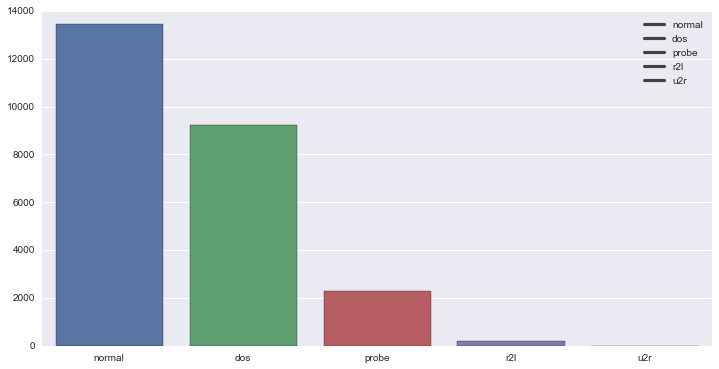

In [4]:
plt.figure(figsize = (12, 6))
print traindata['attackType'].value_counts().index.tolist()
print range(0, len(traindata['attackType'].value_counts()))
print traindata['attackType'].value_counts().tolist()
ax = sns.barplot(x=range(0, len(traindata['attackType'].value_counts())), y=traindata['attackType'].value_counts().tolist())
plt.legend(traindata['attackType'].value_counts().index.tolist(),loc=0)
ax.set_xticklabels(traindata['attackType'].value_counts().index.tolist())

In [5]:
traindata = Processor.normalize(traindata)

In [7]:
traindata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attackType
0,-0.113548,tcp,ftp_data,SF,-0.009889,-0.039309,-0.00891,-0.091221,-0.0063,-0.091932,...,-0.813968,-0.779141,-0.280668,0.073118,-0.287988,-0.641791,-0.627352,-0.221664,-0.374273,normal
1,-0.113548,udp,other,SF,-0.010032,-0.039309,-0.00891,-0.091221,-0.0063,-0.091932,...,-1.030875,-1.157808,2.764349,2.375573,-0.287988,-0.641791,-0.627352,-0.385132,-0.374273,normal
2,-0.113548,tcp,private,S0,-0.010092,-0.039309,-0.00891,-0.091221,-0.0063,-0.091932,...,-0.804931,-0.935063,-0.173825,-0.478174,-0.287988,1.603803,1.614422,-0.385132,-0.374273,dos
3,-0.113548,tcp,http,SF,-0.009996,0.052472,-0.00891,-0.091221,-0.0063,-0.091932,...,1.264717,1.069642,-0.440932,-0.380887,0.073758,-0.574424,-0.604935,-0.385132,-0.342761,normal
4,-0.113548,tcp,http,SF,-0.010010,-0.034581,-0.00891,-0.091221,-0.0063,-0.091932,...,1.264717,1.069642,-0.440932,-0.478174,-0.287988,-0.641791,-0.627352,-0.385132,-0.374273,normal


In [ ]:
traindata_len = len(traindata)
data = pd.concat([traindata, testdata])
trainX, trainY = Processor.process(data, 0, traindata_len)
testX, testY = Processor.process(data,traindata_len, len(data))

In [ ]:
# layer 1: normal v.s. abnormal
trainX1 = trainX.copy()
trainY1 = trainY.copy()
testX1 = testX.copy()
testY1 = testY.copy()

In [ ]:
trainX1.shape

In [ ]:
########################### 1st layer ############################
print "First layer:"
lrParas = {'penalty':['l1','l2'],'C':np.linspace(0.001,1.5,5)}
svmParas = {'kernel':'rbf','C':np.linspace(0.001,1.5,5),'gamma':np.linspace(0.001,1.5,5)}
ks = {'n_neighbors':[3,5]}
clfs1 = dict(
            dt = DecisionTreeClassifier(),\
			rf = RandomForestClassifier(),\
			bnb = BernoulliNB(),\
			lr = GridSearchCV(LogisticRegression(), lrParas),\
			adb = AdaBoostClassifier(),\
			knn = GridSearchCV(KNeighborsClassifier(),ks),\
			#grid = GridSearchCV(svm.SVC(), svmParas)
			)
result = Processor.compareClfs(clfs1, trainX1, trainY1, testX1, testY1)
print result

In [ ]:
# ########################### 2nd layer ############################
ks = {'n_neighbors':[3,5,7,9]}
lrParas = {'penalty':['l1','l2'],'C':np.linspace(0.001,1.5,5)}
clfs2 = [RandomForestClassifier(),\
		tree.DecisionTreeClassifier(),\
		BernoulliNB(),\
		AdaBoostClassifier(),\
		GridSearchCV(KNeighborsClassifier(),ks),\
		GridSearchCV(LogisticRegression(), lrParas)
		]
ec = EnsembleClassifier(clfs2)
ec.fit(trainX2, trainY2)
result = ec.predict(testX)
print 'err2:',1-np.mean(result==testY2)
# err2

In [ ]:
print testY2

In [ ]:
predY = np.zeros(len(trainY))
predNId = [i for i in range(len(predY)) if predY[i] == 1]
predAbnId = [i for i in range(len(predY)) if predY[i] == 0]
predY[predNId] = predY
predY[predAbnId] = result
print 'err:',1-np.mean(testY==predY)